In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
data=pd.read_csv("kc_house_data.csv")
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
data.isnull().sum().sum()

0

In [4]:
data['sqft_living15'].value_counts()

1540    197
1440    195
1560    192
1500    181
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

In [5]:
data['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

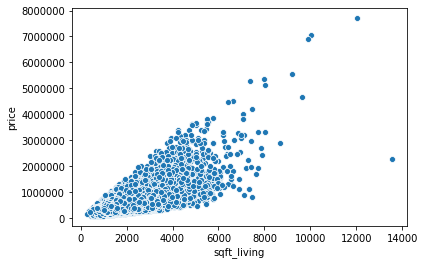

In [6]:
sns.scatterplot(x="sqft_living",y="price",data=data)

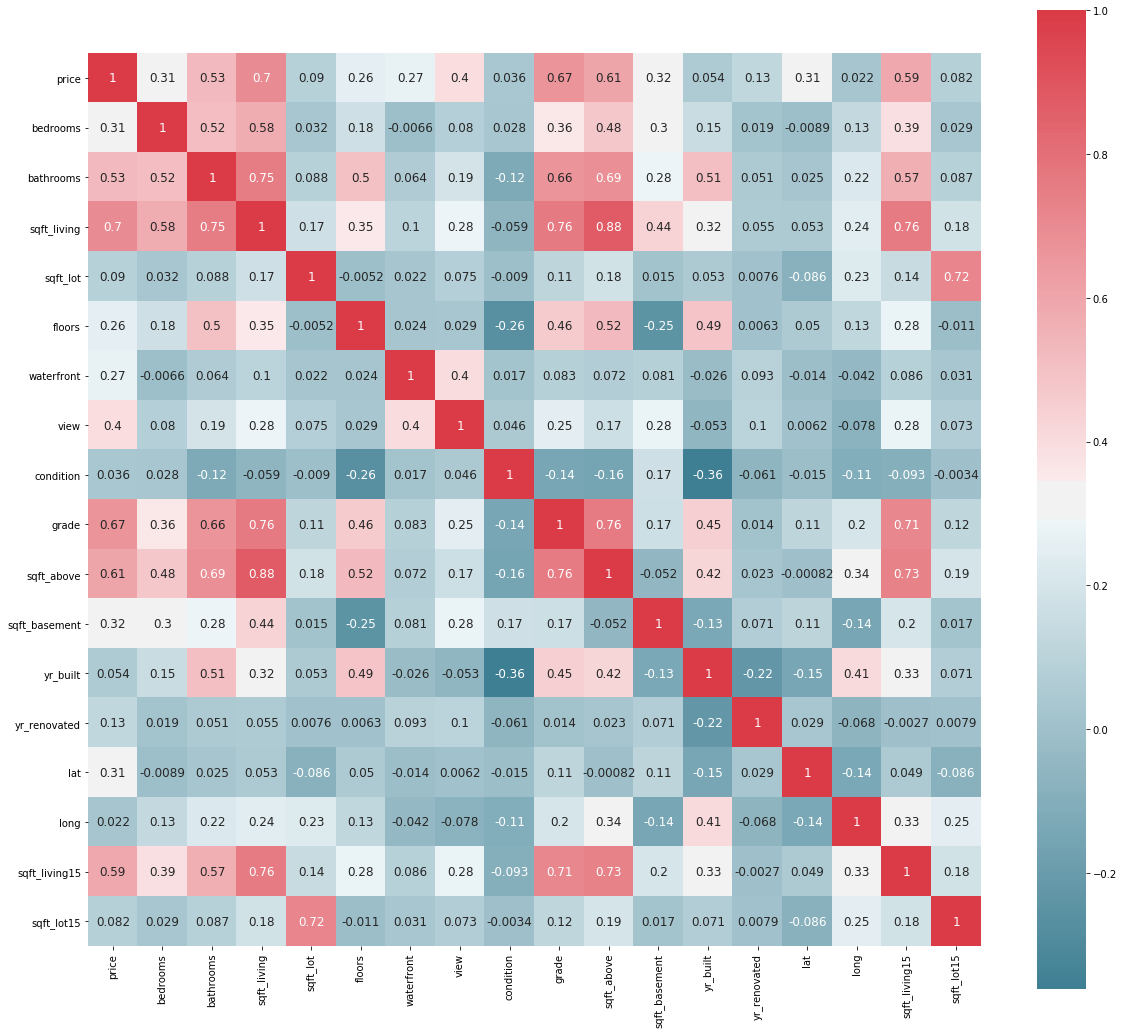

In [7]:
import matplotlib.pyplot as plt
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 20 , 20 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
d=data.drop(["id","zipcode"],axis=1)
plot_correlation_map( d)

In [8]:
data=data.drop(["zipcode"],axis=1)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import metrics

In [10]:
l=["sqft_living"]
y=data["price"].values
df=data.drop(["price"],axis=1)
x=data[l[0]].values[:,np.newaxis]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)



In [11]:

model=LinearRegression()  
model.fit(x_train,y_train)  
predicted=model.predict(x_test) 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 64179676631.68388
R squared 0.4879814110728805


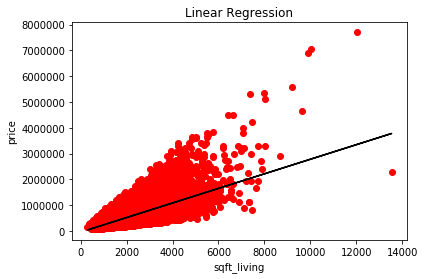

In [12]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

MSE:  58758970775.46333
R squared:  0.5312272220391643


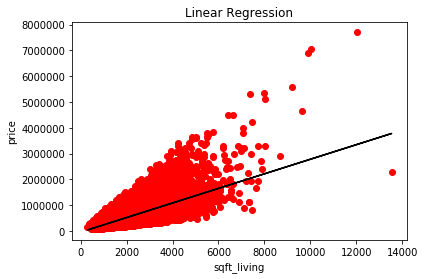

In [13]:
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted =lg.predict(x_test_)


print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))
plt.scatter(x,y,color="r")
plt.title("Linear Regression")

plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

MSE:  58758970775.46333
R squared:  0.5312272220391643


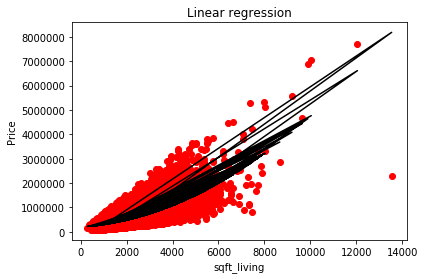

In [14]:
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))
plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("Price")
plt.xlabel("sqft_living")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 


In [15]:
def linear_reg(l=list()):
    y=data["price"].values
    if len(l)==1 :
        x=data[l[0]].values[:,np.newaxis]
    else:
        x=data[l]
      
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
    model=LinearRegression()  
    model.fit(x_train,y_train)  
    predicted=model.predict(x_test) 
    
    if len(l)==1:
        ch=str() 
        for x1 in l:
            ch=ch+','+x1
        plt.scatter(x,y,color="r")
        plt.title("Linear Regression")
        plt.ylabel("price")
        plt.xlabel(ch)
        print(type(x))
        plt.plot(x,model.predict(x),color="k")
        plt.show()
        print("**********************************************************\n***")
    print("MSE", mean_squared_error(y_test,predicted))
    print("R squared", metrics.r2_score(y_test,predicted))
    
    

<class 'numpy.ndarray'>


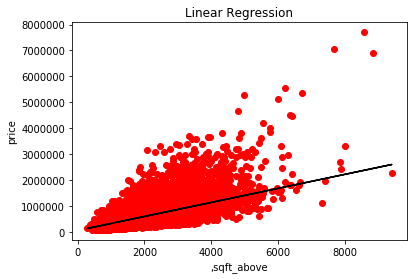

**********************************************************
***
MSE 78645081812.31802
R squared 0.37482795291881355


In [16]:
linear_reg(['sqft_above'])


In [17]:
def poly_reg(l=list()):
    y=data["price"].values
    if len(l)==1 :
        x=data[l[0]].values[:,np.newaxis]
    else:
        x=data[l]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
    lg=LinearRegression()
    poly=PolynomialFeatures(degree=3)

    x_train_fit = poly.fit_transform(x_train) #transforming our input data
    lg.fit(x_train_fit, y_train)
    x_test_ = poly.fit_transform(x_test)
    predicted = lg.predict(x_test_)
    return metrics.r2_score(y_test,predicted)
    #print("MSE: ", metrics.mean_squared_error(y_test, predicted))
    #print("R squared: ",metrics.r2_score(y_test,predicted))

In [18]:
poly_reg(['sqft_living'])



0.5367625844600924

<class 'numpy.ndarray'>


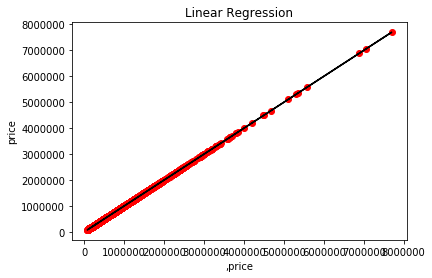

**********************************************************
***
MSE 2.2303657945413526e-19
R squared 1.0


In [19]:
linear_reg(['price'])


In [20]:
feautures=list(data.columns)


In [21]:
def poly_R_squared(l=str()):
    y=data["price"].values
    x=data[l].values[:,np.newaxis] 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
    lg=LinearRegression()
    
    poly=PolynomialFeatures(degree=2)

    x_train_fit = poly.fit_transform(x_train) #transforming our input data
    lg.fit(x_train_fit, y_train)
    x_test_ = poly.fit_transform(x_test)
    predicted = lg.predict(x_test_)

    return  float(metrics.r2_score(y_test,predicted))

In [22]:
def linear_R_squared(l=str()):
    y=data["price"].values
    
    x=data[l].values[:,np.newaxis]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
    model=LinearRegression()  
    model.fit(x_train,y_train)  
    predicted=model.predict(x_test) 
    return float(metrics.r2_score(y_test,predicted))
    

In [23]:
print(poly_R_squared('sqft_living'))
poly_reg(['sqft_living'])



0.5406078367860325


0.5367625844600924

In [24]:
df=data.drop(['id','date','price','yr_built','sqft_lot15','condition'],axis=1)
features=list(df.columns)

features_R_square_poly={}
features_R_square_linear={}
for feature in features :
   
    features_R_square_poly[feature]=poly_R_squared(feature) 
    features_R_square_linear[feature]=linear_R_squared(feature)
    
print('features_R_square_poly: \n',features_R_square_poly)
print("******************************* \n \n \n")
print('features_R_square_linear : \n \n \n',features_R_square_linear)        

features_R_square_poly: 
 {'bedrooms': 0.037134901396941755, 'bathrooms': 0.33425725547794694, 'sqft_living': 0.5406078367860325, 'sqft_lot': 0.00908308450572437, 'floors': 0.0796857291434575, 'waterfront': 0.056878827749915484, 'view': 0.1540228103204554, 'grade': 0.5166655147830267, 'sqft_above': 0.3905669866007805, 'sqft_basement': 0.14342052203268252, 'yr_renovated': 0.012890498359162228, 'lat': 0.12741620408475562, 'long': 0.004418441686873997, 'sqft_living15': 0.3756522612674874}
******************************* 
 
 

features_R_square_linear : 
 
 
 {'bedrooms': 0.11215110915768367, 'bathrooms': 0.2808007973686987, 'sqft_living': 0.5035535751151091, 'sqft_lot': 0.00839377812947506, 'floors': 0.06576140176947043, 'waterfront': 0.05071936511487973, 'view': 0.14720883276861474, 'grade': 0.45520423115329556, 'sqft_above': 0.37482795291881355, 'sqft_basement': 0.10835670484463877, 'yr_renovated': 0.013622955506193635, 'lat': 0.09267066066807106, 'long': 0.0005628058664510771, 'sqft_li

In [25]:
import random 
while (True):
    x=random.randint(0, len(features))
    y=random.randint(0, len(features))
    if x <y:
        if poly_reg(features[x:y])>0.76:
            print(features[x:y])
            print(poly_reg(features[x:y]))
            break
            
        

['waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'long', 'sqft_living15']
0.779004184279319


In [26]:
['floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'long']
0.7789992467760691

0.7789992467760691

In [27]:
 print(poly_reg(['floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'long','sqft_living']))

0.7761429672368783


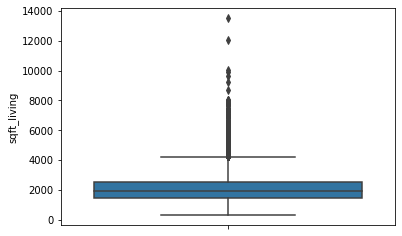

In [28]:
sns.boxplot(y='sqft_living',data=df)